In [1]:
sequence_key = 'p7s1'
camera_number = 1
calibraton_file_path = f"gait3d\\Sequences\\{sequence_key}\\Calibration\\c{camera_number}.xml"
calibraton_file_path

'gait3d\\Sequences\\p7s1\\Calibration\\c1.xml'

In [2]:
with open(calibraton_file_path) as file:
    xml_calibration_config = file.read()
    print(xml_calibration_config)

<?xml version="1.0" encoding="UTF-8"?>
<Camera name="c1">
	<Geometry width="960" height="540" ncx="9.600000e+002" nfx="9.600000e+002" dx="1.000000e+000" dy="1.000000e+000" dpx="1.000000e+000" dpy="1.000000e+000"/>
	<Intrinsic focal="5.561470e+002" kappa1="2.720130e-007" cx="4.800000e+002" cy="2.700000e+002" sx="1.001630e+000"/>
	<Extrinsic tx="2.564550e+001" ty="6.130300e+002" tz="3.444080e+003" rx="-3.121731e+000" ry="1.353192e+000" rz="1.582054e+000"/>
</Camera>



In [36]:
import xml.etree.ElementTree as ET

tree = ET.parse(calibraton_file_path)
root = tree.getroot()

geometry = root.find('Geometry')
intrinsic = root.find('Intrinsic')
extrinsic = root.find('Extrinsic')

width = int(geometry.get('width'))
height = int(geometry.get('height'))

focal_length = float(intrinsic.get('focal'))
k = float(intrinsic.get('kappa1'))

cx = float(intrinsic.get('cx'))
cy = float(intrinsic.get('cy'))

sx = float(intrinsic.get('sx'))

tx = float(extrinsic.get('tx'))
ty = float(extrinsic.get('ty'))
tz = float(extrinsic.get('tz'))

rx = float(extrinsic.get('rx'))
ry = float(extrinsic.get('ry'))
rz = float(extrinsic.get('rz'))

dx = float(geometry.get('dx'))
dy = float(geometry.get('dy'))
dpx = float(geometry.get('dpx'))
dpy = float(geometry.get('dpy'))

print(f"{cx = } {cy = }")
print(f"{sx = }")
print(f"{tx = } {ty = } {tz = }")
print(f"{rx = } {ry = } {rz = }")
print(f"{dx = } {dy = } {dpx = } {dpy = }")

cx = 480.0 cy = 270.0
sx = 1.00163
tx = 25.6455 ty = 613.03 tz = 3444.08
rx = -3.121731 ry = 1.353192 rz = 1.582054
dx = 1.0 dy = 1.0 dpx = 1.0 dpy = 1.0


In [4]:
import numpy as np
import cv2

camera_matrix = np.array([
    [focal_length, 0, cx],
    [0, focal_length, cy],
    [0, 0, 1]
])

#k1 k2 p1 p2 k3 - assume all except k1 equals 0
distortion_coefficients = np.array([k, 0, 0, 0, 0])

translation_vector = np.array([[tx], [ty], [tz]])
rotation_vector = np.array([rx, ry, rz])
rotation_matrix, _ = cv2.Rodrigues(rotation_vector)

In [5]:
camera_matrix

array([[556.147,   0.   , 480.   ],
       [  0.   , 556.147, 270.   ],
       [  0.   ,   0.   ,   1.   ]])

In [6]:
rotation_vector

array([-3.121731,  1.353192,  1.582054])

In [7]:
rotation_matrix

array([[ 0.43996824, -0.30409532, -0.84495798],
       [-0.78761218, -0.582669  , -0.2004093 ],
       [-0.43138729,  0.75367292, -0.49586503]])

In [8]:
translation_vector

array([[  25.6455],
       [ 613.03  ],
       [3444.08  ]])

In [9]:
sample_img_path = './sample_imgs/c1_0090_90.jpg'
sample_image = cv2.imread(sample_img_path)
undistorted_image = cv2.undistort(sample_image, camera_matrix, distortion_coefficients)

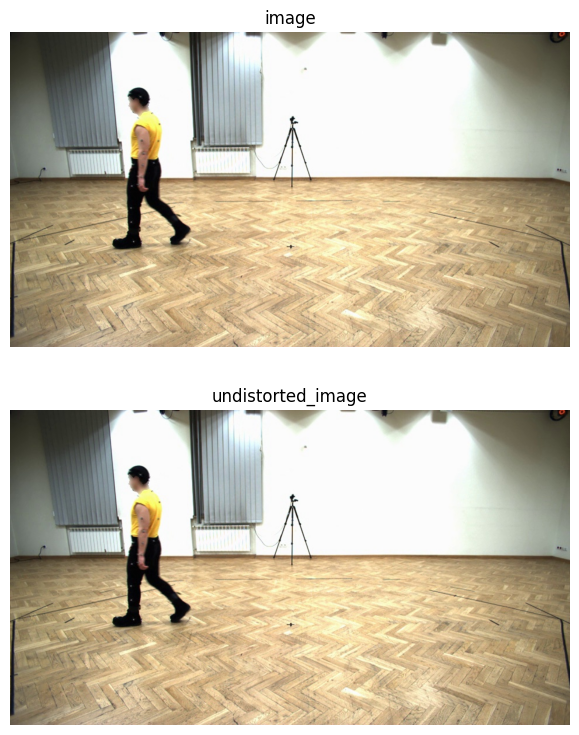

In [10]:
import matplotlib.pyplot as plt

def show_images(image, undistorted_image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    undistorted_image_rgb = cv2.cvtColor(undistorted_image, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(16, 9))
    plt.subplot(2, 1, 1)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title("image")
    
    plt.subplot(2, 1, 2)
    plt.imshow(undistorted_image_rgb)
    plt.axis('off')
    plt.title("undistorted_image")
    
    plt.show()

show_images(sample_image, undistorted_image)

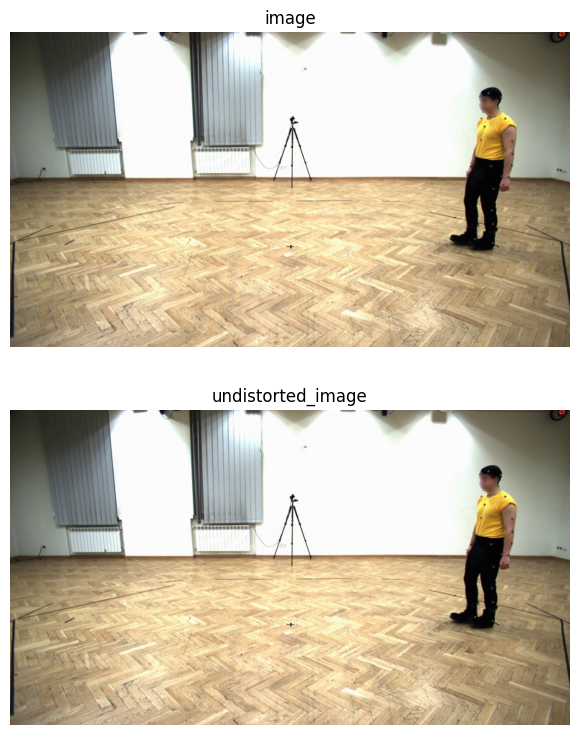

In [11]:
sample_img_path = './sample_imgs/c1_0090_10.jpg'
sample_image_2 = cv2.imread(sample_img_path)
undistorted_image_2 = cv2.undistort(sample_image_2, camera_matrix, distortion_coefficients)
cv2.imwrite('./sample_imgs/c1_0090_10_undistorted.jpg', undistorted_image_2)
show_images(sample_image_2, undistorted_image_2)

In [12]:
# bolow caluculation based on formulas from 
# https://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/DIAS1/

from math import cos, sin
import numpy as np

# assuming rx, ry, rz in radians and no convertion is needed

r1 = cos(ry) * cos(rz)
r2 = cos(rz) * sin(rx) * sin(ry) - cos(rx) * sin(rz)
r3 = sin(rx) * sin(rz) + cos(rx) * cos(rz) * sin(ry)
r4 = cos(ry) * sin(rz)
r5 = sin(rx) * sin(ry) * sin(rz) + cos(rx) * cos(rz)
r6 = cos(rx) * sin(ry) * sin(rz) - cos(rz) * sin(rx)
r7 = - sin(ry)
r8 = cos(ry) * sin(rx)
r9 = cos(rx) * cos(ry)

R = np.array([[r1, r2, r3], [r4, r5, r6], [r7, r8, r9]])
print(R)

T = np.array([tx, ty, tz])
print(T)

[[-0.00243038  0.99995771 -0.0088693 ]
 [ 0.21587739 -0.00813555 -0.97638659]
 [-0.97641746 -0.00428767 -0.21584849]]
[  25.6455  613.03   3444.08  ]


In [13]:
world_coordinates = np.array([0, 0, 0]).T
image_coordinates = R @ world_coordinates + T
print(image_coordinates)

[  25.6455  613.03   3444.08  ]


In [14]:
import c3d
import json
import itertools
from scripts.parsers import parse_sequences


sequence_key = 'p7s1'
file_path = 'gait3d\\ListOfSequences.txt'
sequences = parse_sequences(file_path)
print(json.dumps(sequences[sequence_key], indent=4))

{
    "start_frame": 90,
    "number_of_frames": 120,
    "frame_offset": 0,
    "MoCap_data": true
}


In [15]:
s1_frame_num = (90 + sequences[sequence_key]["start_frame"]) * 4
s2_frame_num = (10 + sequences[sequence_key]["start_frame"]) * 4
# 90 and 10 are known values (taken from file name, image extracted in one of previous notebooks)

In [17]:
sample_c3d_path = f'gait3d\\Sequences\\{sequence_key}\\MoCap\\{sequence_key}.c3d'
markers_number = 39

with open(sample_c3d_path, 'rb') as handle:
    reader = c3d.Reader(handle)
    s1_frame = next(itertools.islice(reader.read_frames(), s1_frame_num, None))[1][:markers_number, :3]

with open(sample_c3d_path, 'rb') as handle:
    reader = c3d.Reader(handle)
    s2_frame = next(itertools.islice(reader.read_frames(), s2_frame_num, None))[1][:markers_number, :3]

C:\Users\Miko7\miniconda3\envs\tf\lib\site-packages\c3d\c3d.py:1219: UserWarning: No analog data found in file.
  warnings.warn('No analog data found in file.')


In [18]:
s1_frame.shape

(39, 3)

In [19]:
s2_frame.shape

(39, 3)

In [65]:
s1_frame[0].reshape((3, 1))

array([[  -43.62601],
       [-1649.3229 ],
       [ 1610.6699 ]], dtype=float32)

In [57]:
s2_frame[0]

array([  54.07066, 1932.0845 , 1603.6761 ], dtype=float32)

In [58]:
s1_image_coordinates = R @ s1_frame[0].reshape((3, 1)) + T.reshape((3, 1))
s1_image_coordinates

array([[-1637.78712018],
       [ -955.6062337 ],
       [ 3146.08828915]])

In [72]:
s1_image_coordinates = R @ s1_frame[0] + T
s1_image_coordinates

array([-1637.78712018,  -955.6062337 ,  3146.08828915])

In [73]:
s2_image_coordinates = R @ s2_frame[0] + T
s2_image_coordinates

array([1943.2933731 , -956.82380973, 3036.84925147])

In [74]:
xi, yi, zi = s1_image_coordinates[0], s1_image_coordinates[1], s1_image_coordinates[2]

xu = focal_length * xi/zi
yu = focal_length * yi/zi

print(f"{xu = }, {yu = }")

xu = -289.5183827697752, yu = -168.926454443548


In [75]:
from math import sqrt

# some mismatch in formulas
r = sqrt(xu ** 2 + yu ** 2)
xd = xu * (1 - k * r ** 2)
yd = yu * (1 - k * r ** 2)

print(f"{r = }")
print(f"{xd = }, {yd = }")

r = 335.1970181437988
xd = -280.669955254919, yd = -163.76362687734817


In [76]:
xf = (sx * xd)/dx + cx
yf = yd/dy + cy
print(f"{xf = }, {yf = }")

xf = 198.87255271801547, yf = 106.23637312265183


(198, 106)


Text(0.5, 1.0, 'image with calculated point')

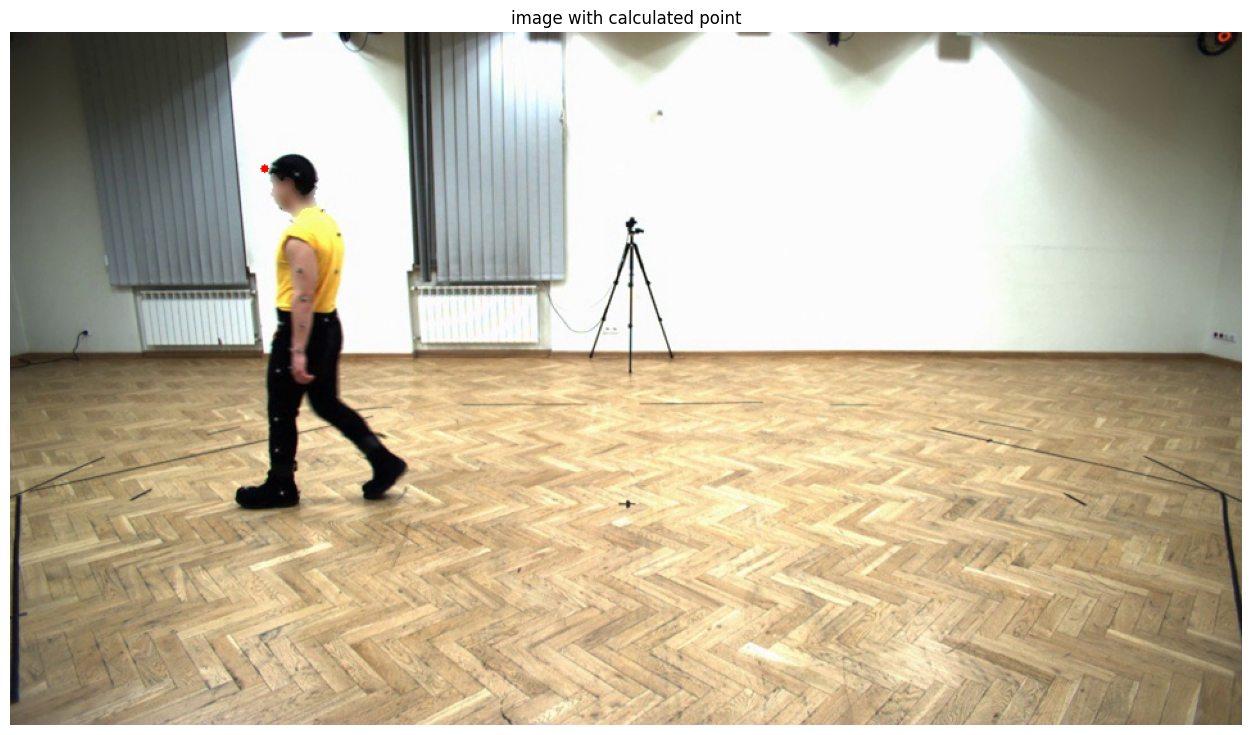

In [78]:
sample_img_path = './sample_imgs/c1_0090_90.jpg'
sample_image = cv2.imread(sample_img_path)

height, width, _ = sample_image.shape

dot_color = (0, 0, 255)
dot_radius = 3 
dot_thickness = -1  # for solid circle
dot_center = (int(xf), int(yf))
print(dot_center)
cv2.circle(sample_image, dot_center, dot_radius, dot_color, dot_thickness)

plt.figure(figsize=(16, 9))
sample_image_rgb = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
plt.imshow(sample_image_rgb)
plt.axis('off')
plt.title("image with calculated point")
